In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect


In [16]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [18]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement= Base.classes.measurement
Station= Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session= Session(engine)

 Exploratory Climate Analysis

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

In [22]:
#find the columns for each table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    pkstr= ""
    if column['primary_key']==1:
        pkstr = "Primary Key"
    print(column["name"],column["type"],pkstr)

id INTEGER Primary Key
station TEXT 
date TEXT 
prcp FLOAT 
tobs FLOAT 


In [23]:
columns= inspector.get_columns('station')
for column in columns:
    pkstr=""
    if column['primary_key']==1:
        pkstr = "Primary Key"
    print(column["name"],column["type"],pkstr)

id INTEGER Primary Key
station TEXT 
name TEXT 
latitude FLOAT 
longitude FLOAT 
elevation FLOAT 


In [24]:
earliestdt= session.query(Measurement.date).order_by(Measurement.date).first()
latestdt= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Earliest: {earliestdt[0]}, Latest: {latestdt[0]}")

Earliest: 2010-01-01, Latest: 2017-08-23


In [25]:
#last 12 months
latest_date= dt.datetime.strptime(latestdt[0], '%Y-%m-%d')
query_date= dt.date(latest_date.year -1, latest_date.month, latest_date.day)
query_date

datetime.date(2016, 8, 23)

In [26]:
date_prcp= [Measurement.date, Measurement.prcp]
results= session.query(*date_prcp).filter(Measurement.date >= query_date).all()
results
#you are able to see what days it rained the past 12 months

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [27]:
#save query to DataFrame
prcp= pd.DataFrame(results, columns=['Date', 'Precipitation'])
prcp= prcp.dropna(how='any')
prcp= prcp.sort_values(["Date"],ascending=True)
prcp=prcp.set_index("Date")
prcp.head(12)

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
2016-08-23,1.79
2016-08-24,1.22
2016-08-24,0.08
2016-08-24,2.15


<function matplotlib.pyplot.show(*args, **kw)>

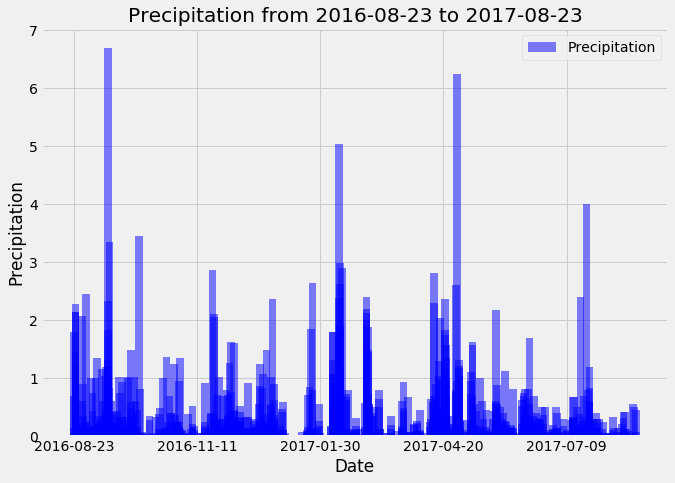

In [28]:
# Use Pandas Plotting with Matplotlib to plot the data
x_value= prcp.index.tolist()
y_value= prcp['Precipitation'].tolist()

plt.figure(figsize=(10,7))
plt.bar(x_value,y_value,width= 5, color= 'b', alpha=0.5, align="center", label='Precipitation')

ticks= np.arange(0,400,80)
plt.xticks(ticks)

plt.title(f"Precipitation from {query_date} to {latestdt[0]}")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.grid(which='major', axis='both', linestyle='-')
plt.legend()
plt.show

In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [30]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()


9

In [31]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
info= [Measurement.station,func.count(Measurement.id)]
active_stations= session.query(*info).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
info= [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
act_st= session.query(*info).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()
act_st

(54.0, 85.0, 71.66378066378067)

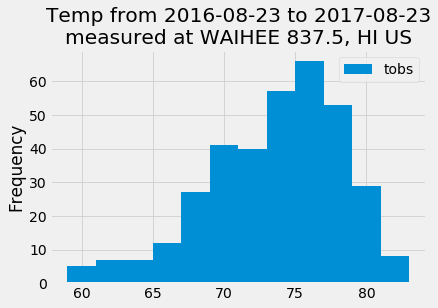

In [38]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_results= session.query(Measurement.tobs).\
    filter(Measurement.station == active_stations[0][0]).\
    filter(Measurement.date >= query_date).all()
temperature = list(np.ravel(query_results))

stations = [Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation]
query_results= session.query(*stations).all()
station= pd.DataFrame(query_results, columns=['Station','Name','Latitude','Longitude','Elevation'])

name= station.loc[station["Station"]==active_stations[0][0],"Name"].tolist()[0]

plt.hist(temperature, bins=12, rwidth=1.0, label='tobs')
plt.grid(axis='both', alpha=0.75)
plt.ylabel('Frequency')
plt.title(f"Temp from {query_date} to {latestdt[0]}\nmeasured at {name}")
plt.legend()

